### Importing Libararies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

### Unfolding the Dataset

In [2]:
dailyActivity = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailyCalories = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyIntensities = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
dailySteps = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
heartrate = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
hourlyCalories = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourlyIntensities = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourlySteps = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
minuteCaloriesNarrow = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minuteCaloriesWide = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv")
minuteIntensitiesNarrow = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minuteIntensitiesWide = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv")
minuteMETsNarrow = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
minuteSleep = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
minuteStepsNarrow = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")
minuteStepsWide = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/minuteStepsWide_merged.csv")
sleepDay = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weightLogInfo = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

### Chekcing the columns of the dataset

In [3]:
#############################
print("---Daily Activity---")
print(dailyActivity.columns)
print()
#############################
print("---Daily Calories---")
print(dailyCalories.columns)
print()
#############################
print("---Daily Intensities---")
print(dailyIntensities.columns)
print()
#############################
print("---Daily Steps---")
print(dailySteps.columns)
print()
#############################
print("---Heart Rate---")
print(heartrate.columns)
print()
#############################
print("---Hourly Calories---")
print(hourlyCalories.columns)
print()
#############################
print("---Hourly Intensities---")
print(hourlyIntensities.columns)
print()
#############################
print("---Hourly Steps---")
print(hourlySteps.columns)
print()
#############################
print("---Minute Calories Narrow---")
print(minuteCaloriesNarrow.columns)
print()
#############################
print("---Minute Calories Wide---")
print(minuteCaloriesWide.columns)
print()
#############################
print("---Minute Intensities Narrow---")
print(minuteIntensitiesNarrow.columns)
print()
#############################
print("---Minute Intensities Wide---")
print(minuteIntensitiesWide.columns)
print()
#############################
print("---Minute METs Narrow---")
print(minuteMETsNarrow.columns)
print()
#############################
print("---Minute Sleep---")
print(minuteSleep.columns)
print()
#############################
print("---Minute Sleep Narrow---")
print(minuteStepsNarrow.columns)
print()
#############################
print("---Minute Sleep Wide---")
print(minuteStepsWide.columns)
print()
#############################
print("---Sleep Day---")
print(sleepDay.columns)
print()
#############################
print("---Weight Log Info---")
print(weightLogInfo.columns)
print()
#############################

---Daily Activity---
Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

---Daily Calories---
Index(['Id', 'ActivityDay', 'Calories'], dtype='object')

---Daily Intensities---
Index(['Id', 'ActivityDay', 'SedentaryMinutes', 'LightlyActiveMinutes',
       'FairlyActiveMinutes', 'VeryActiveMinutes', 'SedentaryActiveDistance',
       'LightActiveDistance', 'ModeratelyActiveDistance',
       'VeryActiveDistance'],
      dtype='object')

---Daily Steps---
Index(['Id', 'ActivityDay', 'StepTotal'], dtype='object')

---Heart Rate---
Index(['Id', 'Time', 'Value'], dtype='object')

---Hourly Calories---
Index(['Id', 'ActivityHour', 'Calories'], dtype='object')

---Hourly Intensities---
Index(['

### Checking the first 5 datas in the dataset

In [4]:
print("#############################")
print("dailyActivity DataFrame:") 
print(dailyActivity.head())
print("#############################")
print("dailyCalories DataFrame:") 
print(dailyCalories.head())
print("#############################")
print("\nDaily Intensities DataFrame:") 
print(dailyIntensities.head())
print("#############################")
print("\nDaily Steps DataFrame:") 
print(dailySteps.head())
print("#############################")
print("\nHeartrate DataFrame:") 
print(heartrate.head())
print("#############################")
print("\nHourly Calories DataFrame:") 
print(hourlyCalories.head())
print("#############################")
print("\nHourly Intensities DataFrame:") 
print(hourlyIntensities.head())
print("#############################")
print("\nHourly Steps DataFrame:") 
print(hourlySteps.head())
print("#############################")
print("\nMinute Calories Narrow DataFrame:") 
print(minuteCaloriesNarrow.head())
print("#############################")
print("\nMinute Calories Wide DataFrame:") 
print(minuteCaloriesWide.head())
print("#############################")
print("\nMinute Intensities Narrow DataFrame:") 
print(minuteIntensitiesNarrow.head())
print("#############################")
print("\nMinute Intensities Wide DataFrame:") 
print(minuteIntensitiesWide.head())
print("#############################")
print("\nMinute METs Narrow DataFrame:") 
print(minuteMETsNarrow.head())
print("#############################")
print("\nMinute Sleep DataFrame:") 
print(minuteSleep.head())
print("#############################")
print("\nMinute Steps Narrow DataFrame:") 
print(minuteStepsNarrow.head())
print("#############################")
print("\nMinute Steps Wide DataFrame:") 
print(minuteStepsWide.head())
print("#############################")
print("\nSleep Day DataFrame:") 
print(sleepDay.head())
print("#############################")
print("\nWeight Log Info DataFrame:") 
print(weightLogInfo.head())
print("#############################")

#############################
dailyActivity DataFrame:
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActi

### Plotiing the Histogram [Steps vs Frequency]

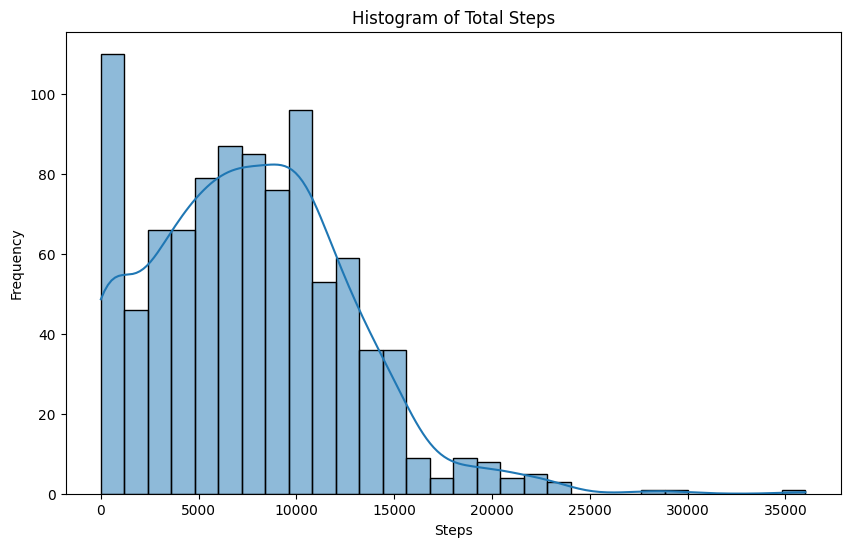

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(dailyActivity['TotalSteps'], bins=30, kde=True)
plt.title('Histogram of Total Steps')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

Number of unique participants in dailyActivity: 33
Number of unique participants in sleepDay: 24
Number of observations in dailyActivity: 940
Number of observations in sleepDay: 413
Summary of dailyActivity:
          TotalSteps  TotalDistance  SedentaryMinutes
count    940.000000     940.000000        940.000000
mean    7637.910638       5.489702        991.210638
std     5087.150742       3.924606        301.267437
min        0.000000       0.000000          0.000000
25%     3789.750000       2.620000        729.750000
50%     7405.500000       5.245000       1057.500000
75%    10727.000000       7.712500       1229.500000
max    36019.000000      28.030001       1440.000000
Summary of sleepDay:
        TotalSleepRecords  TotalMinutesAsleep  TotalTimeInBed
count         413.000000          413.000000      413.000000
mean            1.118644          419.467312      458.639225
std             0.345521          118.344679      127.101607
min             1.000000           58.000000    

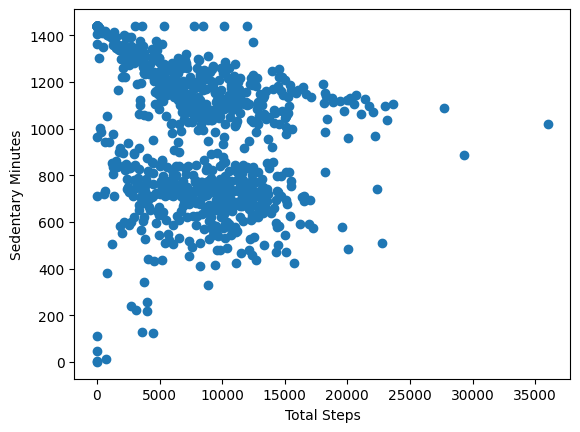

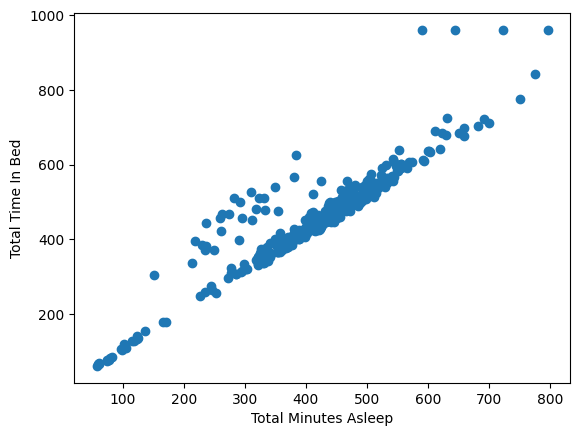

Number of unique participants in combined_data: 24
Number of unique participants in combined_data (outer join): 33


In [6]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files into dataframes
dailyCalories = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
dailyActivity = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleepDay = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

# Convert the 'date' column in the dataframe to a datetime object
# dailyCalories['date'] = pd.to_datetime(dailyCalories['date'])
if 'ActivityDay' in dailyCalories.columns:
    dailyCalories['date'] = dailyCalories['ActivityDay'].apply(lambda x: x.split()[0])
    dailyCalories['date'] = pd.to_datetime(dailyCalories['date'])
else:
    print("Error: 'ActivityDay' column not found.")

# Check the number of unique participants in both datasets
print("Number of unique participants in dailyActivity:", dailyActivity['Id'].nunique())
print("Number of unique participants in sleepDay:", sleepDay['Id'].nunique())

# Check the number of observations
print("Number of observations in dailyActivity:", len(dailyActivity))
print("Number of observations in sleepDay:", len(sleepDay))

# Check data summary
print("Summary of dailyActivity:\n", dailyActivity[['TotalSteps', 'TotalDistance', 'SedentaryMinutes']].describe())
print("Summary of sleepDay:\n", sleepDay[['TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed']].describe())

# Plot graphs
plt.scatter(dailyActivity['TotalSteps'], dailyActivity['SedentaryMinutes'])
plt.xlabel('Total Steps')
plt.ylabel('Sedentary Minutes')
plt.show()

plt.scatter(sleepDay['TotalMinutesAsleep'], sleepDay['TotalTimeInBed'])
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Total Time In Bed')
plt.show()

# Merge both datasets together by Id
combined_data = pd.merge(sleepDay, dailyActivity, on="Id")

# Check the number of participants on the combined table
print("Number of unique participants in combined_data:", combined_data['Id'].nunique())

# Merge both datasets together again by Id using Outer join
combined_data = pd.merge(sleepDay, dailyActivity, on="Id", how='outer')

# Check the number of participants on the combined table
print("Number of unique participants in combined_data (outer join):", combined_data['Id'].nunique())

In [7]:
import pandas as pd

# Assuming you have a CSV file named 'calories.csv'
dailyCalories = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")

# Drop rows with duplicate values
dailyCalories = dailyCalories.drop_duplicates()

# Fill missing values in 'ActivityDay' column with a default value
default_value = '00:00:00'
dailyCalories['ActivityDay'].fillna(default_value, inplace=True)

# Fill missing values in 'Calories' column with 0
dailyCalories['Calories'].fillna(0, inplace=True)

# Save the cleaned data to a new CSV file
dailyCalories.to_csv('cleaned_calories.csv', index=False)

In [8]:
cleaned_data = pd.read_csv('/kaggle/working/cleaned_calories.csv')
print(cleaned_data)

             Id ActivityDay  Calories
0    1503960366   4/12/2016      1985
1    1503960366   4/13/2016      1797
2    1503960366   4/14/2016      1776
3    1503960366   4/15/2016      1745
4    1503960366   4/16/2016      1863
..          ...         ...       ...
935  8877689391    5/8/2016      2847
936  8877689391    5/9/2016      3710
937  8877689391   5/10/2016      2832
938  8877689391   5/11/2016      3832
939  8877689391   5/12/2016      1849

[940 rows x 3 columns]


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


dailyActivity = pd.read_csv("/kaggle/input/bellabeat-case-study/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

# Drop rows with duplicate values
dailyActivity = dailyActivity.drop_duplicates()

# Fill missing values in 'ActivityDate' column with a default value
default_value = '00:00:00'
dailyActivity['ActivityDate'].fillna(default_value, inplace=True)

# Fill missing values in 'SedentaryMinutes' column with 0
dailyActivity['SedentaryMinutes'].fillna(0, inplace=True)

# Create a binary target variable 'sedentary' based on a threshold (adjust as needed)
sedentary_threshold = dailyActivity['SedentaryMinutes'].median()
dailyActivity['sedentary'] = (dailyActivity['SedentaryMinutes'] > sedentary_threshold).astype(int)

# Features and target variable
X = dailyActivity[['TotalSteps', 'SedentaryMinutes']]
y = dailyActivity['sedentary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        94
           1       1.00      0.99      0.99        94

    accuracy                           0.99       188
   macro avg       0.99      0.99      0.99       188
weighted avg       0.99      0.99      0.99       188

Confusion Matrix:
[[94  0]
 [ 1 93]]


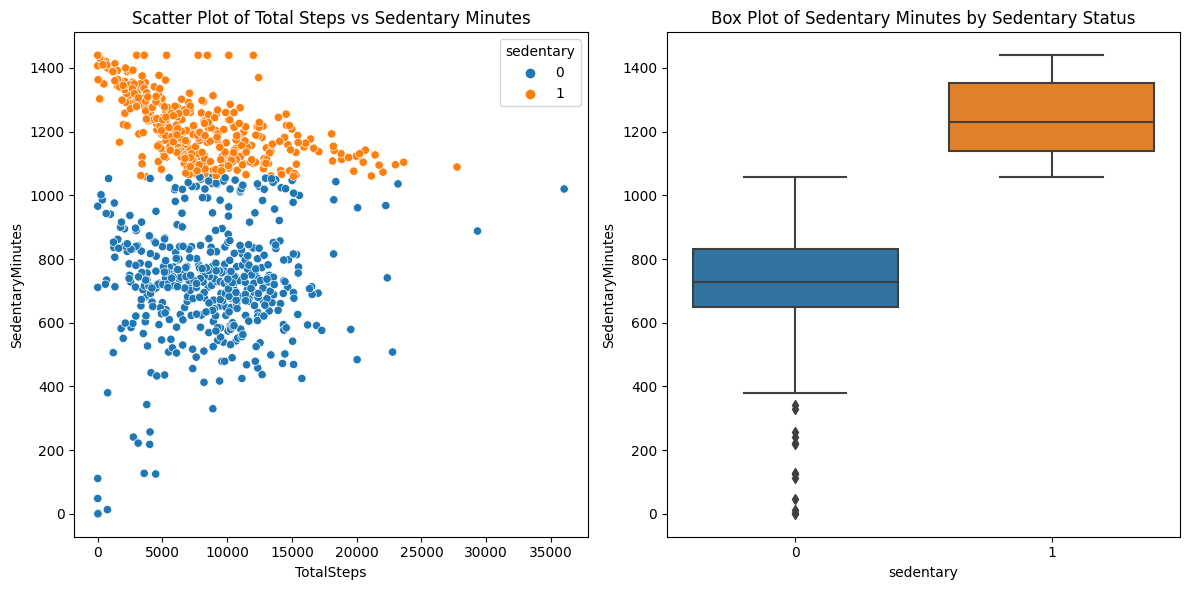

In [10]:
# Visualization of the data
plt.figure(figsize=(12, 6))

# Scatter plot of TotalSteps vs SedentaryMinutes
plt.subplot(1, 2, 1)
sns.scatterplot(x='TotalSteps', y='SedentaryMinutes', hue='sedentary', data=dailyActivity)
plt.title('Scatter Plot of Total Steps vs Sedentary Minutes')

# Box plot of SedentaryMinutes by sedentary status
plt.subplot(1, 2, 2)
sns.boxplot(x='sedentary', y='SedentaryMinutes', data=dailyActivity)
plt.title('Box Plot of Sedentary Minutes by Sedentary Status')

plt.tight_layout()
plt.show()

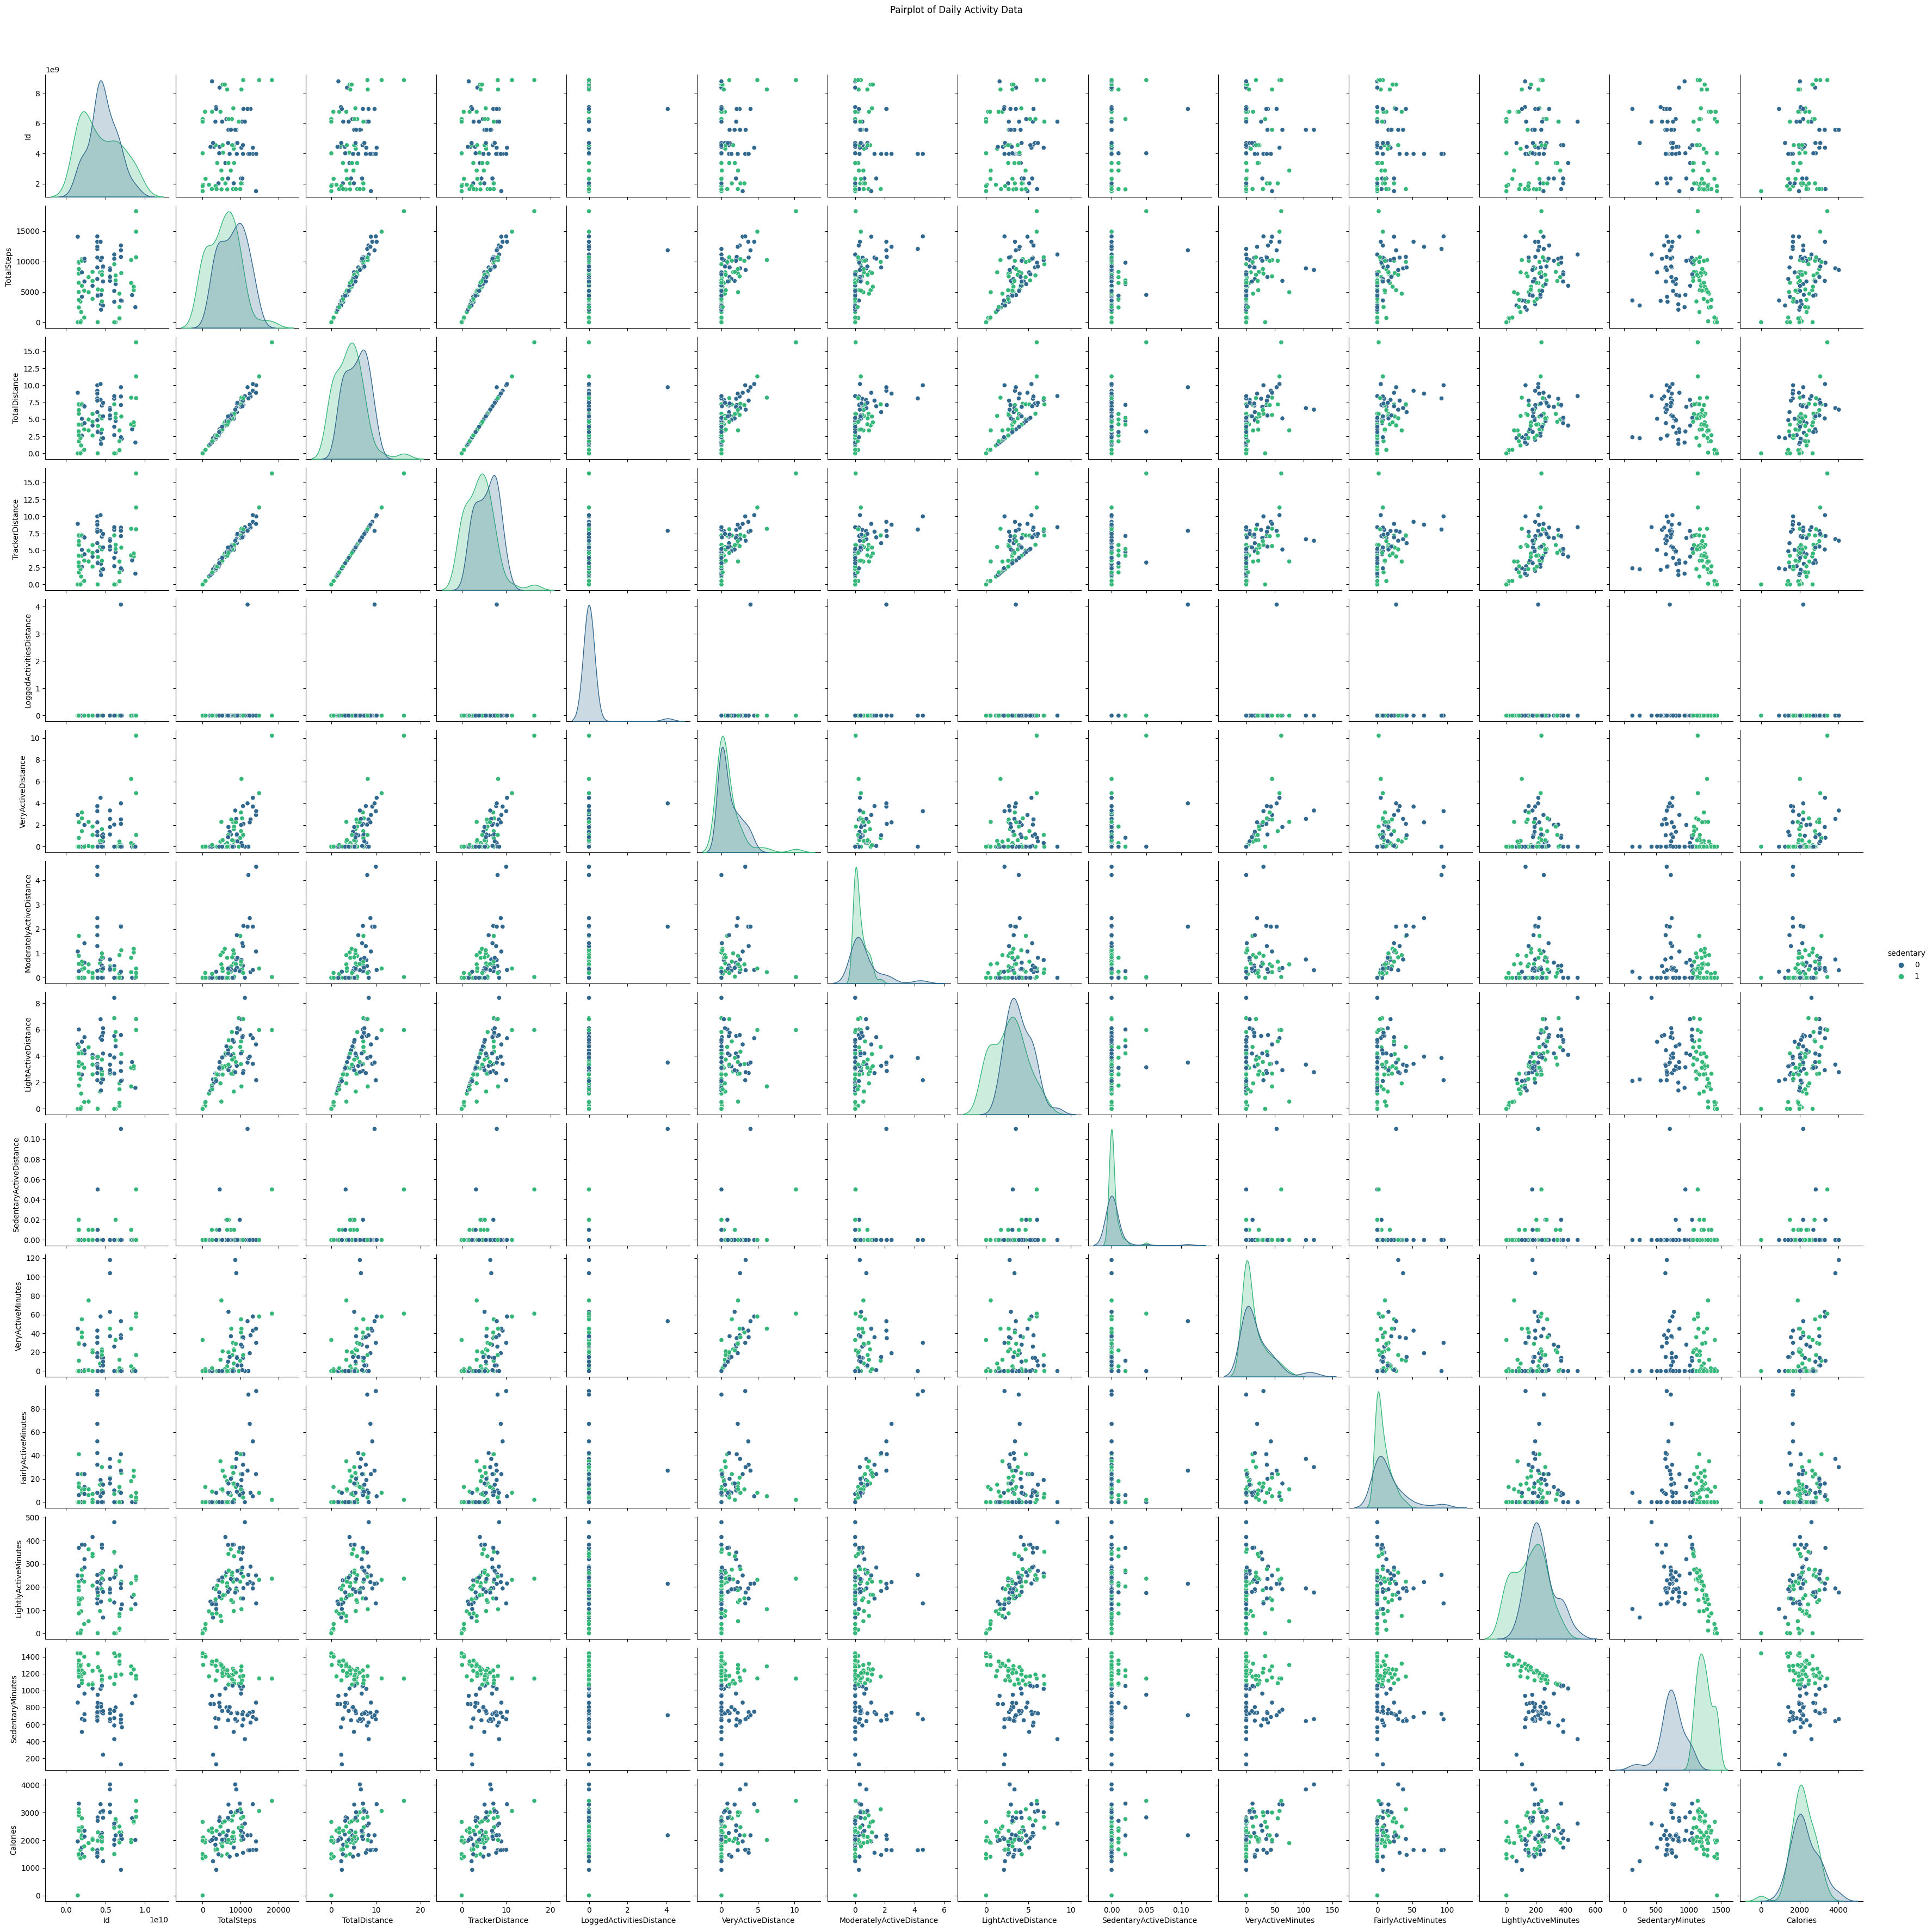

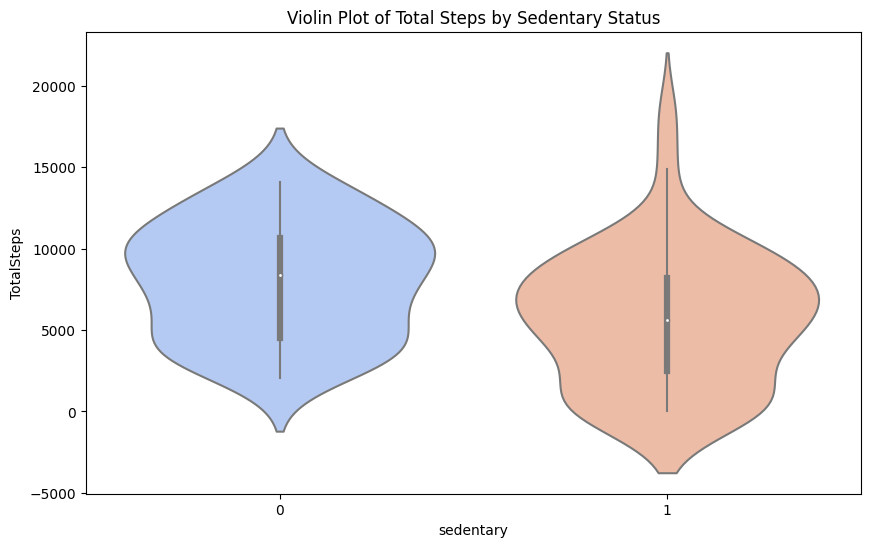

In [11]:


dailyActivity_sample = dailyActivity.sample(frac=0.1, random_state=42)

# Visualizations
sns.pairplot(dailyActivity_sample, hue='sedentary', palette='viridis')
plt.suptitle('Pairplot of Daily Activity Data', y=1.02)
plt.show()


# Violinplot of TotalSteps by sedentary status
plt.figure(figsize=(10, 6))
sns.violinplot(x='sedentary', y='TotalSteps', data=dailyActivity_sample, palette='coolwarm')
plt.title('Violin Plot of Total Steps by Sedentary Status')
plt.show()

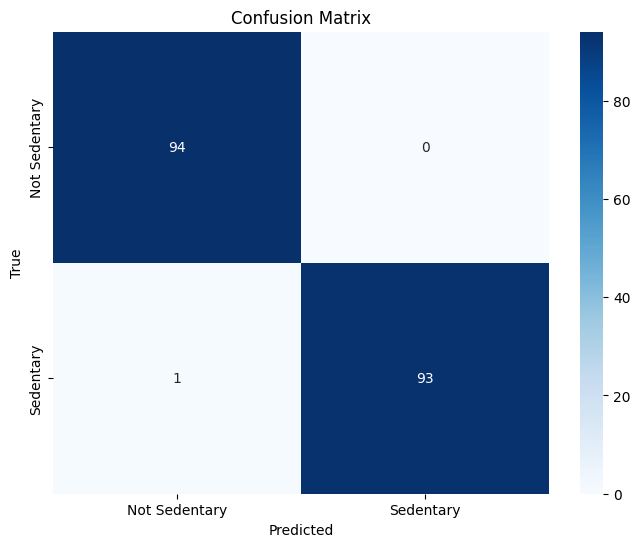

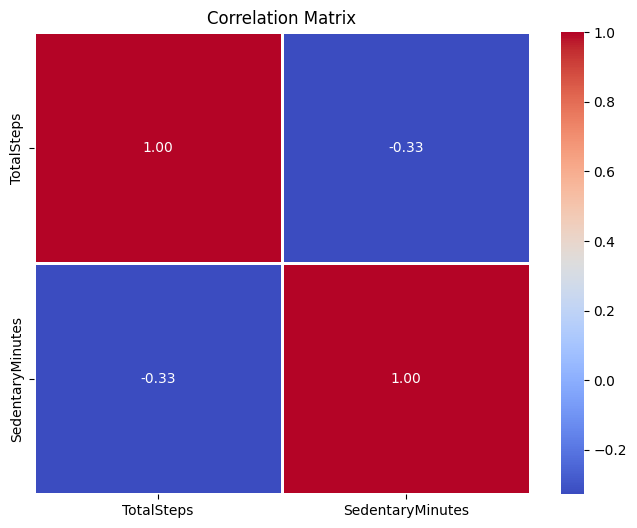

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Sedentary', 'Sedentary'], yticklabels=['Not Sedentary', 'Sedentary'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Correlation Matrix
correlation_matrix = dailyActivity[['TotalSteps', 'SedentaryMinutes']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix')
plt.show()

<hr>

### as the previous pair plot was too messy so I made a pairplot based on some specific columns


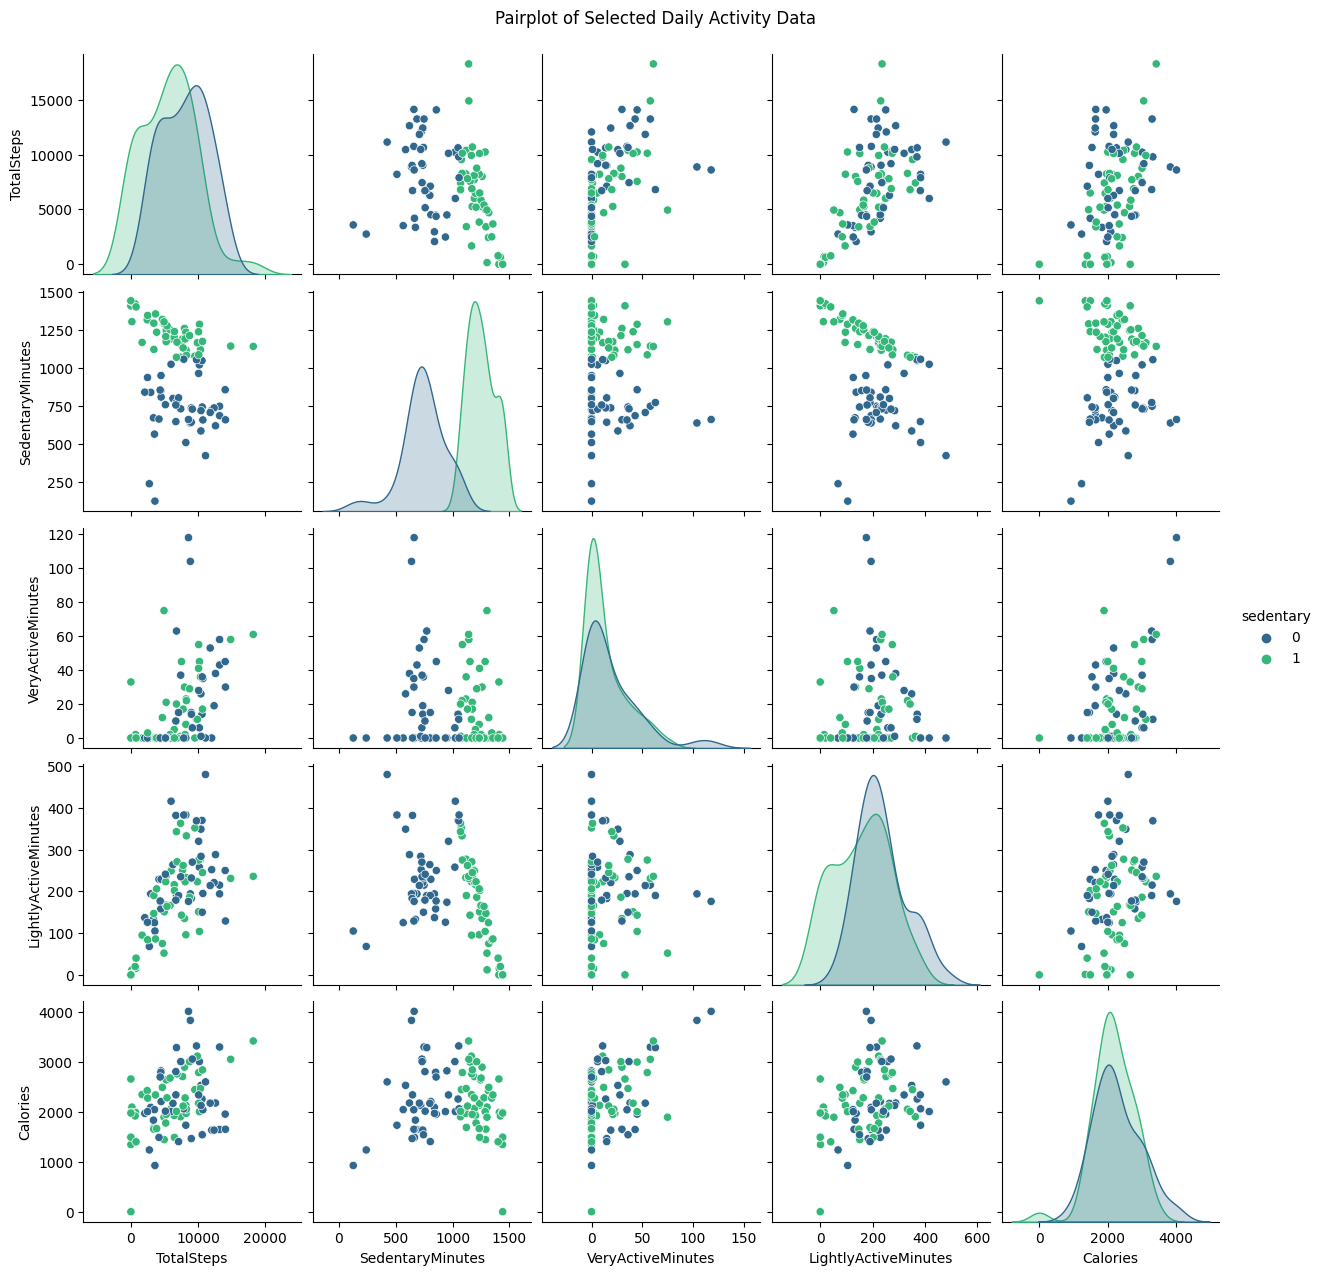

In [13]:
selected_columns = ['TotalSteps', 'SedentaryMinutes', 'VeryActiveMinutes', 'LightlyActiveMinutes', 'Calories']

# Visualizations
sns.pairplot(dailyActivity.sample(frac=0.1, random_state=42), vars=selected_columns, hue='sedentary', palette='viridis')
plt.suptitle('Pairplot of Selected Daily Activity Data', y=1.02)
plt.show()